In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('winequality-red.csv', sep=';')

In [11]:
df.shape

(1599, 12)

In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: xlabel='volatile acidity', ylabel='quality'>

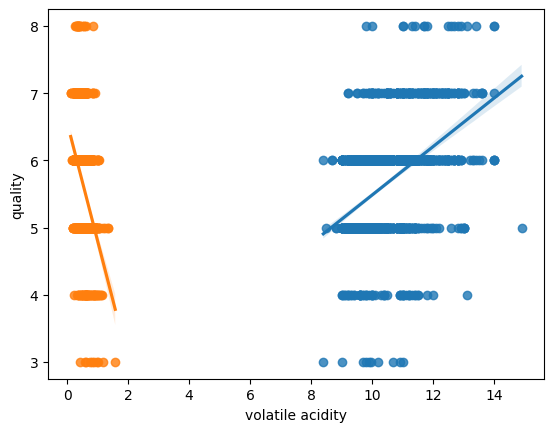

In [15]:
sns.regplot(x='alcohol', y='quality', data=df)
sns.regplot(x='volatile acidity', y='quality', data=df)

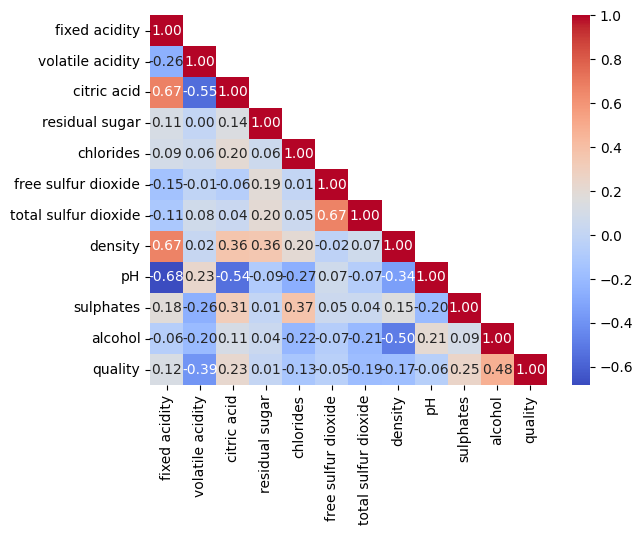

In [40]:
mask = np.triu(np.ones_like(df.corr()), k=1)
plt.Figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, mask=mask, cmap='coolwarm', fmt='.2f')
plt.show()

sns.pairplot(df, diag_kind='kde', markers='o', hue='quality', palette='viridis')

In [13]:
X = df.drop('quality', axis=1)
y = df['quality']

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_scaled = scaler.fit_transform(X)
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

In [19]:
y = y.values.reshape(-1, 1)

In [25]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    return cost

In [26]:
def gradient_descent(X, y, theta, learning_rate, epochs):
    m = len(y)
    cost_history = []
    
    for _ in range(epochs):
        predictions = X.dot(theta)
        error = predictions - y
        gradient = (1 / m) * X.T.dot(error)
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history
        

In [27]:
theta_initial = np.zeros((X_scaled.shape[1], 1))


In [30]:
theta_optimal, cost_history = gradient_descent(X_scaled, y, theta_initial, learning_rate=0.01, epochs=200)

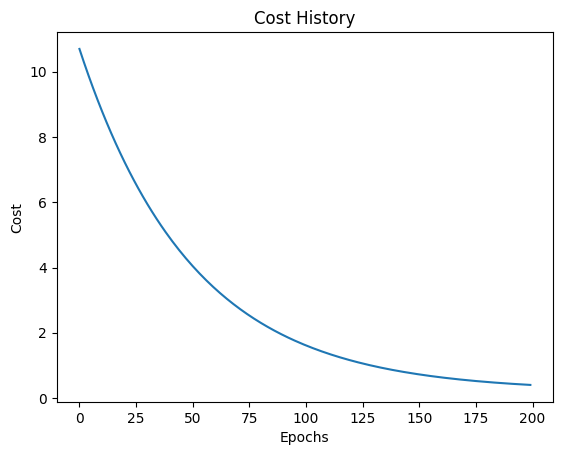

In [31]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()

In [57]:
features = ['Bias'] + df.columns[:-1].tolist()

In [58]:
coeffs = pd.DataFrame({
	'Feature': features,
	'Coefficient': theta_optimal[:].flatten()
 })

In [59]:
coeffs.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
0,Bias,5.017851
11,alcohol,0.246676
10,sulphates,0.140021
1,fixed acidity,0.049467
3,citric acid,0.039019
4,residual sugar,0.028424
6,free sulfur dioxide,0.019543
9,pH,-0.021919
8,density,-0.079573
5,chlorides,-0.082530


In [60]:
y_pred = X_scaled @ theta_optimal

[]

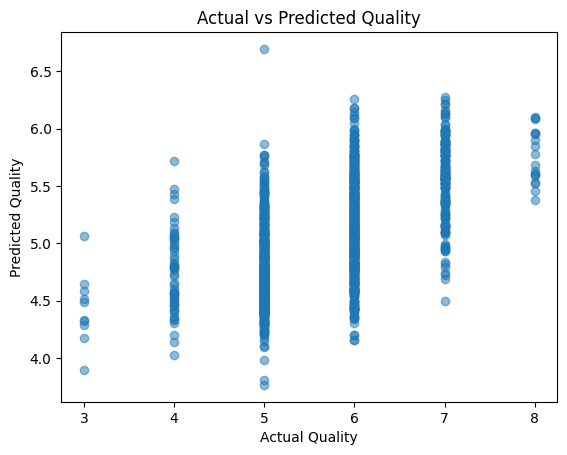

In [ ]:
min = y.min()
max = y.max()

plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality')
# plt.plot([2, 8], [2, 8], color='red', linestyle='--')
plt.plot()


In [69]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.8024828042975386
R^2 Score: -0.23125405000099075
